In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])

In [11]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [12]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [13]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3,random_state=0)

In [15]:
clf = DecisionTreeClassifier()

In [16]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [17]:
accuracy_score(y_test, y_pred)

0.6604477611940298

In [18]:
clf = DecisionTreeClassifier()
np.mean(cross_val_score(clf, x, y,cv=10, scoring='accuracy'))

np.float64(0.6633208489388265)

In [26]:
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')


In [27]:
trf = ColumnTransformer([
    ('first', kbin_age, [0]),
    ('second', kbin_fare, [1])

])

In [28]:
x_train_trf = trf.fit_transform(x_train)
x_test_trf = trf.transform(x_test)

c:\Users\user\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KBinsDiscretizer was fitted with feature names
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KBinsDiscretizer was fitted with feature names
  warnings.warn(


In [29]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.67      ,  9.        , 18.        , 21.        , 23.43333333,
              26.        , 29.        , 29.69911765, 31.66666667, 35.        ,
              38.6       , 44.        , 51.        , 80.        ])            ],
      dtype=object)

In [30]:
clf = DecisionTreeClassifier()
clf.fit(x_train_trf, y_train)
y_pred2 = clf.predict(x_test)

In [36]:
accuracy_score(y_test, y_pred)

0.6604477611940298

In [37]:

np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))

np.float64(0.6655805243445692)

In [49]:
def dis(bins, strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins, encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins, encode='ordinal',strategy=strategy)

    trf = ColumnTransformer([
        ('first', kbin_age, [0]),
        ('second', kbin_fare, [1])
    ])

    x_trf = trf.fit_transform(x)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy')))

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Age'])
    plt.title('Before')

    plt.subplot(122)
    plt.hist(x_trf[:,0], color='red')
    plt.title('Before')

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Fare'])
    plt.title('Before')

    plt.subplot(122)
    plt.hist(x_trf[:,1],color='red')
    plt.title('Before')

    plt.show()



0.6621972534332086


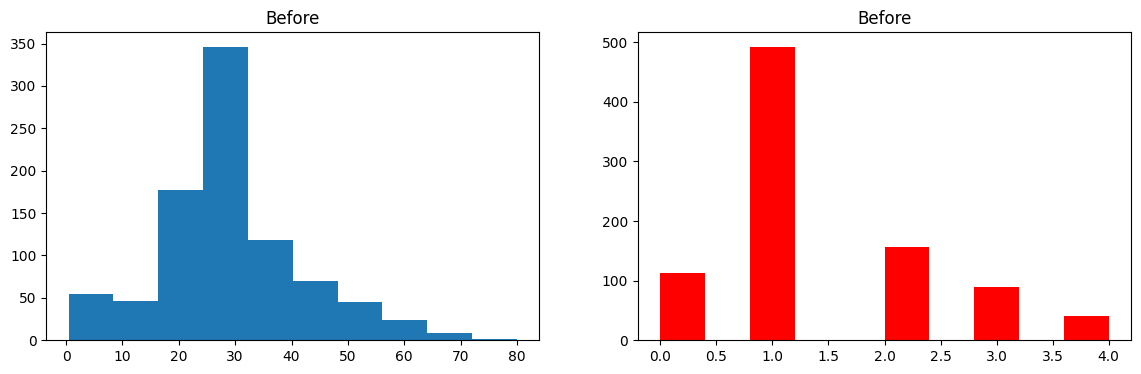

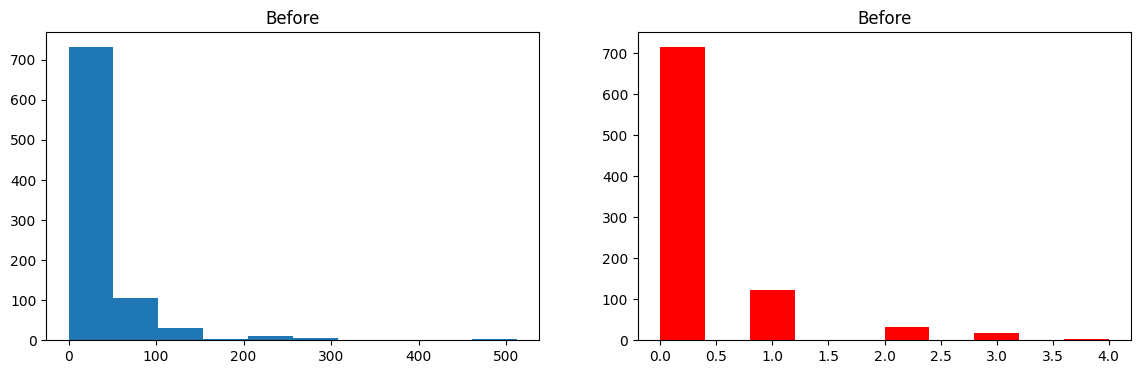

In [50]:
dis(5,'kmeans')